## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

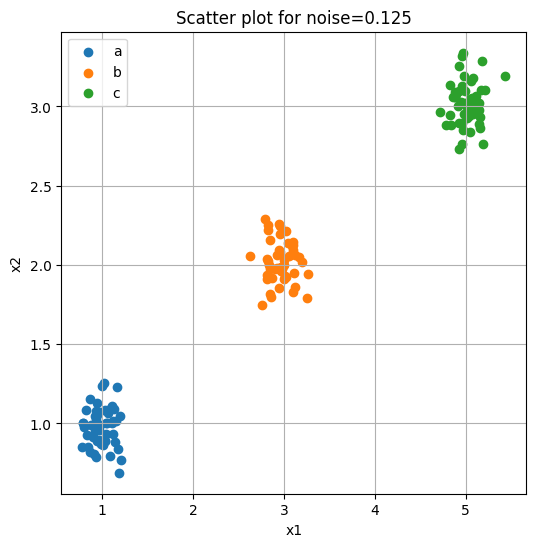

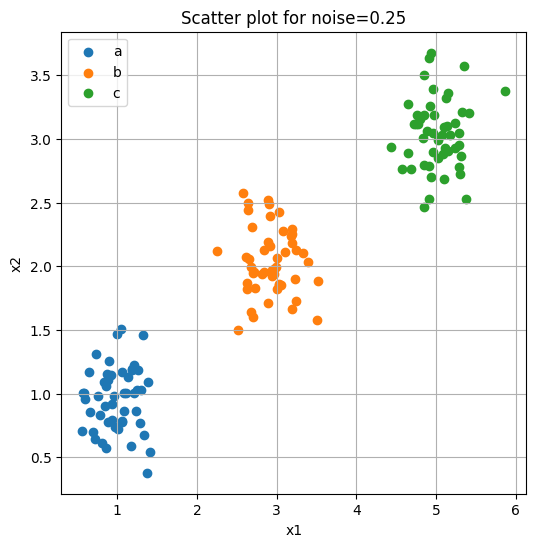

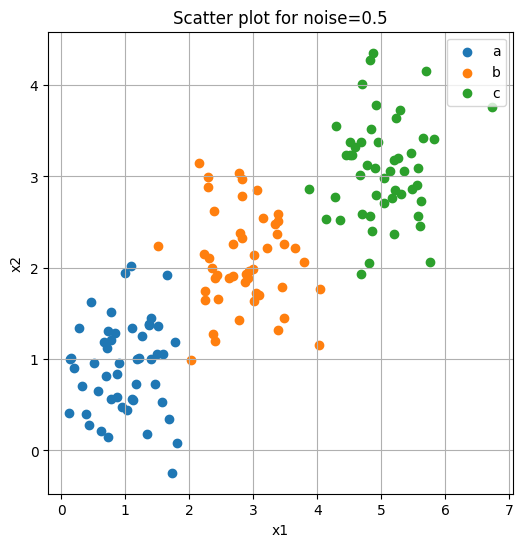

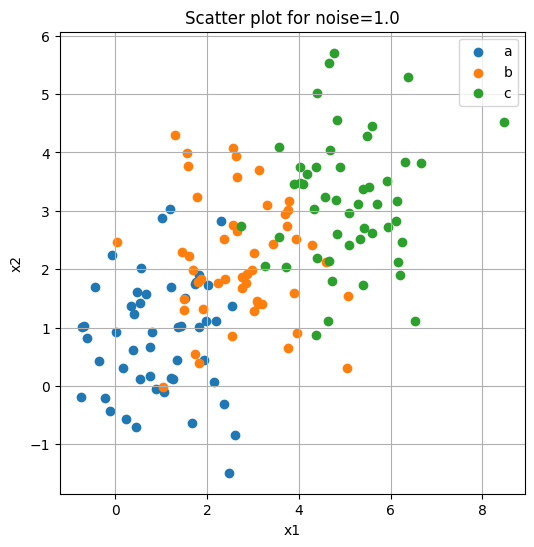

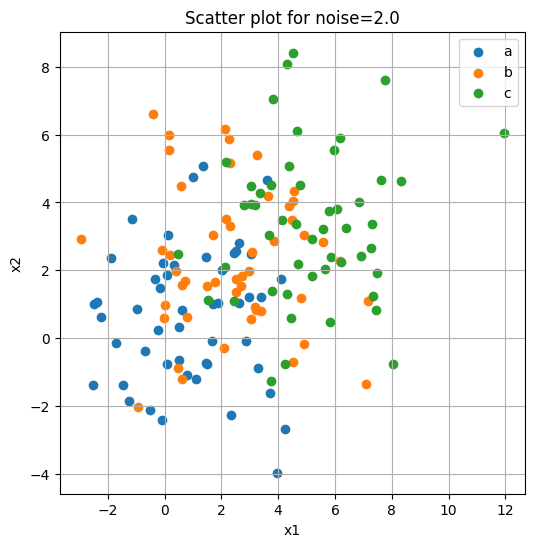

In [2]:
import matplotlib.pyplot as plt

dataframes = {
    'noise=0.125': df0_125,
    'noise=0.25': df0_25,
    'noise=0.5': df0_5,
    'noise=1.0': df1_0,
    'noise=2.0': df2_0
}

for title, df in dataframes.items():
    plt.figure(figsize=(6, 6))
    for group in df['group'].unique():
        subset = df[df['group'] == group]
        plt.scatter(subset['x1'], subset['x2'], label=group)
    plt.title(f'Scatter plot for {title}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # As the noise goes up, the data spreads more and becomes less localized; the clusters become less visually distinct and start to overlap more.
    # The intuition with the elbow method is that the within cluster sum of squares decreases as you increase the number of clusters. With more clusters, data points are closer to their respective cluster centroids, resulting in a smaller sum of squared distances.

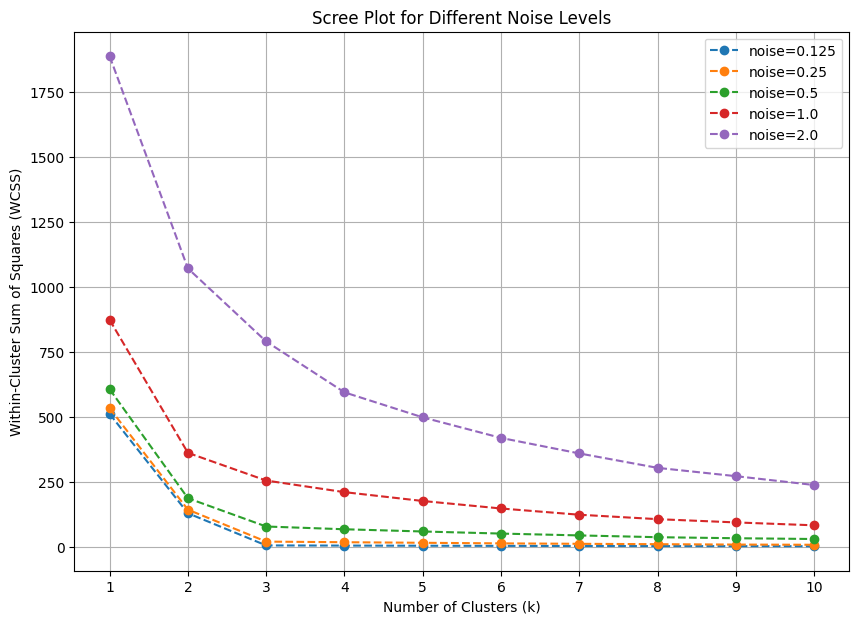

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_wcss(data):
    wcss = []
    # Calculate WCSS for k from 1 to 10
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=100, n_init=10)
        kmeans.fit(data[['x1', 'x2']])
        wcss.append(kmeans.inertia_)
    return wcss

wcss_values = {}
for title, df in dataframes.items():
    wcss_values[title] = calculate_wcss(df)

plt.figure(figsize=(10, 7))
for title, wcss in wcss_values.items():
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--', label=title)

plt.title('Scree Plot for Different Noise Levels')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()

# The elbow becomes less distinct and the curve becomes more gradual. This elbow point represents the exact value of k where the rate of decrease in the within cluster sum of squares changes.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [10]:
import pandas as pd

# loading the data
df_election = pd.read_csv('/content/2022 election cycle fundraising.csv')

dollar_columns = ['Raised', 'Spent', 'Cash on Hand', 'Debts']

# clean the dollar-denominated columns
for col in dollar_columns:
    # remove '$' and commas, then convert to numeric, coercing errors !!
    df_election[col] = df_election[col].astype(str).str.replace('[$,]', '', regex=True)
    df_election[col] = pd.to_numeric(df_election[col], errors='coerce')

# displaying the first few rows and info to verify cleaning
display(df_election.head())
display(df_election.info())

# I handle it by coercing all the errors and stripping the weird strings and symbols to better formatting for later analysis.

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396,7449678,851851,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741,1243502,2472888,0
2,2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
3,3,Adam Smith,Democratic,Washington,House,1211111,1173466,623472,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611,1664674,1098579,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         537 non-null    int64 
 1   Member        537 non-null    object
 2   Party         537 non-null    object
 3   State         537 non-null    object
 4   Chamber       537 non-null    object
 5   Raised        537 non-null    int64 
 6   Spent         537 non-null    int64 
 7   Cash on Hand  537 non-null    int64 
 8   Debts         537 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 37.9+ KB


None

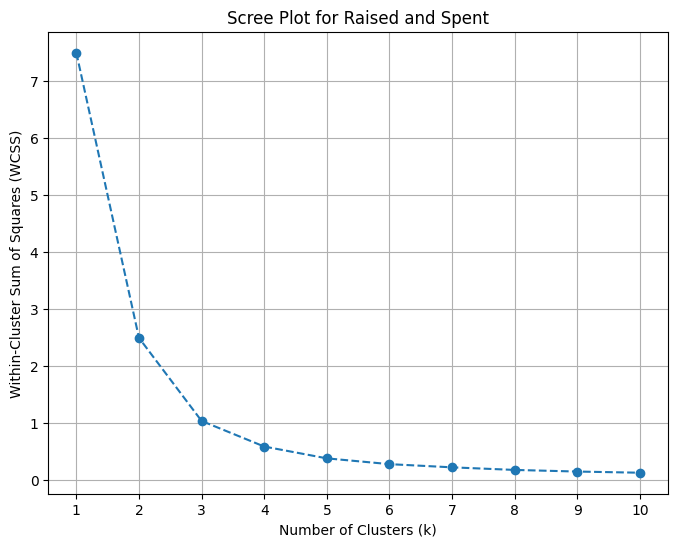

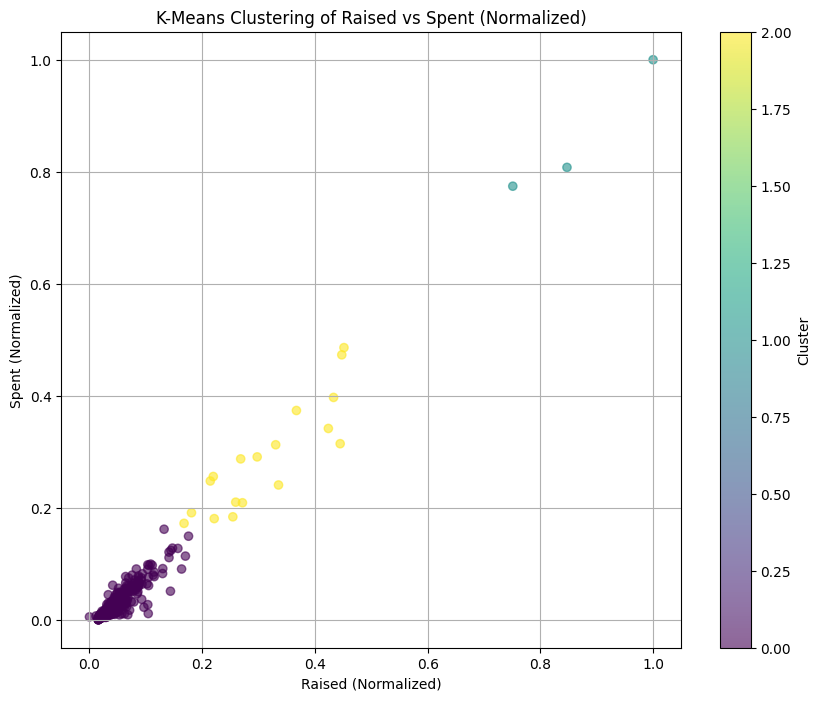

Number of members in each cluster:


,count
Cluster_Raised_Spent,
0,516
1,3
2,18


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# select the columns for clustering
clustering_cols = ['Raised', 'Spent']
df_clustering = df_election[clustering_cols].copy()

# max-min normalizing the selected columns
scaler = MinMaxScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)
df_clustering_scaled = pd.DataFrame(df_clustering_scaled, columns=clustering_cols)

# calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=100, n_init=10)
    kmeans.fit(df_clustering_scaled)
    wcss.append(kmeans.inertia_)

# create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Scree Plot for Raised and Spent')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# based on the scree plot, I chose an optimal k of 3
optimal_k = 3

# perform K-Means clustering with the chosen optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=100, n_init=10)
df_election['Cluster_Raised_Spent'] = kmeans.fit_predict(df_clustering_scaled)

# create a scatter plot of Raised against Spent, colored by cluster membership
plt.figure(figsize=(10, 8))
plt.scatter(df_clustering_scaled['Raised'], df_clustering_scaled['Spent'], c=df_election['Cluster_Raised_Spent'], cmap='viridis', marker='o', alpha=0.6)
plt.title('K-Means Clustering of Raised vs Spent (Normalized)')
plt.xlabel('Raised (Normalized)')
plt.ylabel('Spent (Normalized)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# display the number of members in each cluster
print("Number of members in each cluster")
display(df_election['Cluster_Raised_Spent'].value_counts().sort_index())

In [12]:
# Identify the two smallest clusters
cluster_counts = df_election['Cluster_Raised_Spent'].value_counts().sort_values(ascending=True)
smallest_clusters = cluster_counts.head(2).index.tolist()

print(f"The two smallest clusters: {smallest_clusters}")

# Display the members of the smallest clusters
for cluster_id in smallest_clusters:
    print(f"\nMembers of Cluster {cluster_id}:")
    display(df_election[df_election['Cluster_Raised_Spent'] == cluster_id][['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts']])

The two smallest clusters are: [1, 2]

Members of Cluster 1:


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
340,Mark Kelly,Democratic,Arizona,Senate,73140886,61357281,13186127,0
417,Raphael Warnock,Democratic,Georgia,Senate,86581469,75959810,22762985,0
523,Val Demings,Democratic,Florida,House,64682883,58806664,6647641,0



Members of Cluster 2:


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811,35928936,5089745,0
89,Chuck Schumer,Democratic,New York,Senate,35899966,25944350,20231213,0
115,Dan Crenshaw,Republican,Texas,House,14535870,14512435,1876149,0
261,John Kennedy,Republican,Louisiana,Senate,28119082,18276565,15530074,0
290,Katie Porter,Democratic,California,House,21441693,15946876,15762568,0
298,Kevin McCarthy,Republican,California,House,24791538,22086344,7507326,0
326,Maggie Hassan,Democratic,New Hampshire,Senate,30914830,28380992,4813508,0
328,Marco Rubio,Republican,Florida,Senate,36709285,30153111,9631856,0
357,Michael Bennet,Democratic,Colorado,Senate,18086343,13713611,4898614,374819


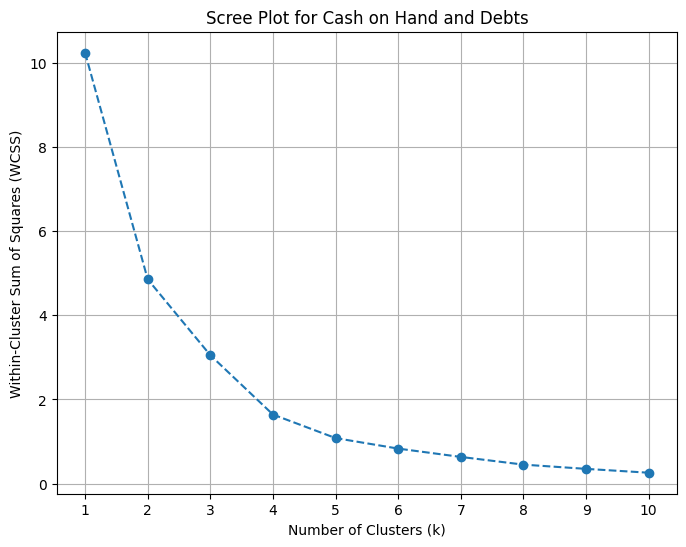

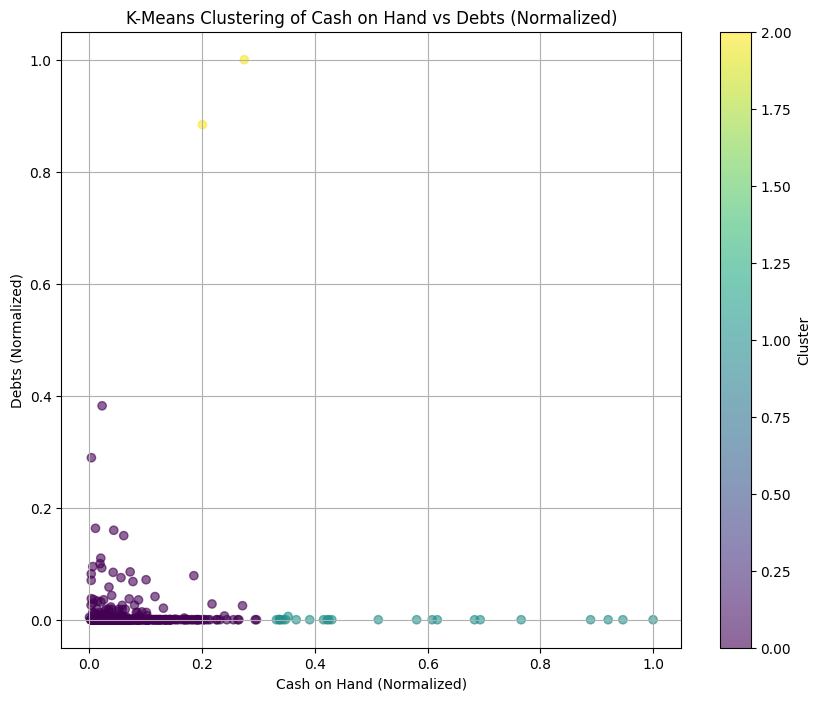

Number of members in each cluster:


,count
Cluster_Coh_Debts,
0,511
1,24
2,2



The two smallest clusters are: [2, 1]

Members of Cluster 2:


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
133,David Trone,Democratic,Maryland,House,12990741,6878050,6206371,13302000
442,Ron Johnson,Republican,Wisconsin,Senate,27680901,23731653,4508581,11759857



Members of Cluster 1:


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
2,Adam Schiff,Democratic,California,House,20993041,13957854,20942888,0
11,Alex Padilla,Democratic,California,Senate,11253771,3870947,7617654,5703
45,Bernie Sanders,Independent,Vermont,Senate,14074831,11331428,9751125,0
89,Chuck Schumer,Democratic,New York,Senate,35899966,25944350,20231213,0
112,Cory Booker,Democratic,New Jersey,Senate,5794554,4010634,7671026,0
239,Jim Jordan,Republican,Ohio,House,12417107,9675701,8855217,0
247,Joe Manchin,Democratic,West Virginia,Senate,7790164,835794,9414431,0
261,John Kennedy,Republican,Louisiana,Senate,28119082,18276565,15530074,0
267,John Thune,Republican,South Dakota,Senate,6770674,2763217,17419927,0
274,Josh Gottheimer,Democratic,New Jersey,House,7720264,2045198,14024163,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# selecting the columns for clustering
clustering_cols_coh_debts = ['Cash on Hand', 'Debts']
df_clustering_coh_debts = df_election[clustering_cols_coh_debts].copy()

# max-min normalize the selected columns
scaler_coh_debts = MinMaxScaler()
df_clustering_coh_debts_scaled = scaler_coh_debts.fit_transform(df_clustering_coh_debts)
df_clustering_coh_debts_scaled = pd.DataFrame(df_clustering_coh_debts_scaled, columns=clustering_cols_coh_debts)

# calculate WCSS for different numbers of clusters
wcss_coh_debts = []
for i in range(1, 11):
    kmeans_coh_debts = KMeans(n_clusters=i, random_state=100, n_init=10)
    kmeans_coh_debts.fit(df_clustering_coh_debts_scaled)
    wcss_coh_debts.append(kmeans_coh_debts.inertia_)

# create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_coh_debts, marker='o', linestyle='--')
plt.title('Scree Plot for Cash on Hand and Debts')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# optimal k
optimal_k_coh_debts = 3

# perform K-Means clustering with the chosen optimal k
kmeans_coh_debts = KMeans(n_clusters=optimal_k_coh_debts, random_state=100, n_init=10)
df_election['Cluster_Coh_Debts'] = kmeans_coh_debts.fit_predict(df_clustering_coh_debts_scaled)

# create a scatter plot of Cash on Hand against Debts, colored by cluster membership (for analysis)
plt.figure(figsize=(10, 8))
plt.scatter(df_clustering_coh_debts_scaled['Cash on Hand'], df_clustering_coh_debts_scaled['Debts'], c=df_election['Cluster_Coh_Debts'], cmap='viridis', marker='o', alpha=0.6)
plt.title('K-Means Clustering of Cash on Hand vs Debts (Normalized)')
plt.xlabel('Cash on Hand (Normalized)')
plt.ylabel('Debts (Normalized)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# display the number of members in each cluster
print("Number of members in each cluster:")
display(df_election['Cluster_Coh_Debts'].value_counts().sort_index())

# identify the two smallest clusters
cluster_counts_coh_debts = df_election['Cluster_Coh_Debts'].value_counts().sort_values(ascending=True)
smallest_clusters_coh_debts = cluster_counts_coh_debts.head(2).index.tolist()

print(f"\nThe two smallest clusters: {smallest_clusters_coh_debts}")

# display the members of the smallest clusters
for cluster_id in smallest_clusters_coh_debts:
    print(f"\nMembers of Cluster {cluster_id}:")
    display(df_election[df_election['Cluster_Coh_Debts'] == cluster_id][['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts']])
# The clustering based on 'Cash on Hand' and 'Debts' also resulted in a large cluster with the majority of candidates (Cluster 0) and two much smaller clusters representing the candidates with higher values for these columns. The members of the smallest clusters are different in this case in these two columns though. Cluster 2 (the smallest) contains David Trone and Ron Johnson. These candidates appear to have relatively high levels of debts compared to others, which sets them apart and into this cluster. I looked up David Trone and it turns out he self funds his campaign, which would explain high debt levels. Ron Johnson's inclusion is less clear but probably another fundraising anomaly. Cluster 1 contains 24 candidates with relatively higher cash on hand or some level of debt. This cluster includes many of the same high-profile candidates who were in the smaller clusters for 'Raised' and 'Spent'. This overlap makes sense because candidates who raise and spend a lot are also likely to have significant cash on hand or carry some level of debt. The differences in cluster membership between the 'Raised'/'Spent' and 'Cash on Hand'/'Debts' clustering are likely due to the different financial aspects being revealed through the data.

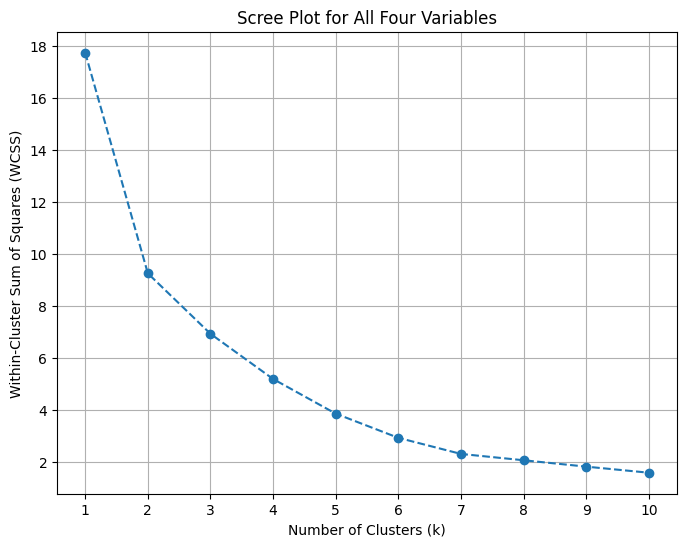

Number of members in each cluster:


,count
Cluster_All,
0,500
1,34
2,3



Describe table conditional on cluster membership:


Raised                                                       \
             count          mean           std         min          25%   
Cluster_All                                                               
0            500.0  2.220408e+06  2.040360e+06  -1386356.0    916412.25   
1             34.0  1.748378e+07  1.119096e+07     20520.0   7803606.75   
2              3.0  7.480175e+07  1.104336e+07  64682883.0  68911884.50   

                                                  Spent                ...  \
                    50%          75%         max  count          mean  ...   
Cluster_All                                                            ...   
0             1604059.5   2897637.25  14535870.0  500.0  1.781719e+06  ...   
1            13831851.0  24216310.25  38334636.0   34.0  1.344149e+07  ...   
2            73140886.0  79861177.50  86581469.0    3.0  6.537458e+07  ...   

            Cash on Hand              Debts                                    \
                     75%         max  count           mean           std  min   
Cluster_All                                                                     
0             1655768.50   6134163.0  500.0   85071.806000  3.751249e+05  0.0   
1            11162826.75  21539824.0   34.0  752600.382353  2.995607e+06  0.0   
2            17974556.00  22762985.0    3.0       0.000000  0.000000e+00  0.0   

                                           
             25%  50%     75%         max  
Cluster_All                                
0            0.0  0.0  195.25   5081387.0  
1            0.0  0.0    0.00  13302000.0  
2            0.0  0.0    0.00         0.0  

[3 rows x 32 columns]

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# selecting the columns for clustering
clustering_cols_all = ['Raised', 'Spent', 'Cash on Hand', 'Debts']
df_clustering_all = df_election[clustering_cols_all].copy()

# max-min normalize the selected columns
scaler_all = MinMaxScaler()
df_clustering_all_scaled = scaler_all.fit_transform(df_clustering_all)
df_clustering_all_scaled = pd.DataFrame(df_clustering_all_scaled, columns=clustering_cols_all)

# calculate WCSS for different numbers of clusters
wcss_all = []
for i in range(1, 11):
    kmeans_all = KMeans(n_clusters=i, random_state=100, n_init=10)
    kmeans_all.fit(df_clustering_all_scaled)
    wcss_all.append(kmeans_all.inertia_)

# create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_all, marker='o', linestyle='--')
plt.title('Scree Plot for All Four Variables')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

optimal_k_all = 3

# perform K-Means clustering with the chosen optimal k
kmeans_all = KMeans(n_clusters=optimal_k_all, random_state=100, n_init=10)
df_election['Cluster_All'] = kmeans_all.fit_predict(df_clustering_all_scaled)

# display the number of members in each cluster
print("Number of members in each cluster")
display(df_election['Cluster_All'].value_counts().sort_index())

# compute describe table conditional on cluster membership
print("\nDescribe table conditional on cluster membership:")
display(df_election.groupby('Cluster_All')[clustering_cols_all].describe())

# 4 Similar to the previous cluster formation, clustering with all four variables also results in a large cluster (Cluster 0) containing the overwhelming majority of candidates (500), and smaller clusters representing candidates with genrally higher values across these metrics.
# 5 Yes, the K-Means clustering algorithm did find useful patterns in analyzing the election fundraising data. It found candidates with higher financial activity in geneder, found candidates with high levels of fundraising, cash on hand, debt, etc, and how these different columns affect the cluster forming.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?